In [375]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
#from sklearn.metrics import classification_repo
#rt, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [281]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [369]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [376]:
df = pd.read_csv('google_reviews5.csv')
df.head()

,query,name,google_id,place_id,location_link,reviews_link,reviews_per_score,reviews,rating,review_id,...,review_img_urls,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id
0,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChZDSUhNMG9nS0VJQ0FnSURScjhhVlNBEAE,...,https://lh5.googleusercontent.com/p/AF1QipMWTU...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.683401e+09,05/06/2023 19:20,0.0,-6.370000e+18
1,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUNKdnJLY3RnRRAB,...,https://lh5.googleusercontent.com/p/AF1QipMcUy...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.687931e+09,06/28/2023 05:41:44,1.0,-6.370000e+18
2,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChZDSUhNMG9nS0VJQ0FnSURoczRuWU1BEAE,...,https://lh5.googleusercontent.com/p/AF1QipMrQg...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.679049e+09,03/17/2023 10:27:11,1.0,-6.370000e+18
3,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUNKLXNhMnpRRRAB,...,https://lh5.googleusercontent.com/p/AF1QipOCqJ...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.687723e+09,06/25/2023 19:54:18,0.0,-6.370000e+18
4,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUR4OGFfVTNnRRAB,...,https://lh5.googleusercontent.com/p/AF1QipP7KU...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.686415e+09,06/10/2023 16:43,0.0,-6.370000e+18


In [377]:
# List of column names to drop
columns_to_drop = ['query','google_id', 'location_link', 'reviews_link','reviews_per_score', 'review_id',
                  'review_img_urls','author_image', 'owner_answer_timestamp','owner_answer_timestamp_datetime_utc',
                   'review_datetime_utc','author_title','review_img_url','author_link','review_timestamp']

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

In [378]:
df.head()

,name,place_id,reviews,rating,author_id,review_text,owner_answer,review_link,review_rating,review_likes,reviews_id
0,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,This place is absolutely outstanding. It was a...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,-6.370000e+18
1,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.110000e+20,Excellent dinner experience in the city center...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.0,-6.370000e+18
2,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.150000e+20,Outstanding from start to finish!\n\nEnjoyed a...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.0,-6.370000e+18
3,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.070000e+20,Called in on a Saturday without a booking with...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,-6.370000e+18
4,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.070000e+20,"We went today for lunch, food was amazing! The...",NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,-6.370000e+18


In [285]:
print (df['rating'].unique())

[4.4 4.1 4.2 3.9 4.5 4.6 4.3 4.7 4.8 3.  3.5 3.8 3.2 3.1 2.9 2.8 3.3 3.4
 3.6 3.7 4.9]


In [286]:
#EDA
df.isnull().sum()

name                0
place_id            0
reviews             0
rating              0
author_id           0
review_text         0
owner_answer     1146
review_link         1
review_rating       1
review_likes        1
reviews_id          1
dtype: int64

In [379]:
df['review_text']. dropna() #need to deal with missing data-delete rows?, justify. empty reviews dropped, not useful to dataset

0       This place is absolutely outstanding. It was a...
1       Excellent dinner experience in the city center...
2       Outstanding from start to finish!\n\nEnjoyed a...
3       Called in on a Saturday without a booking with...
4       We went today for lunch, food was amazing! The...
                              ...                        
1323    Probably the best vegan burger I've ever had. ...
1324    Cozy little restaurant with really tasty food....
1325    Very cosy, intimate restaurant. Lovely staff, ...
1326    So many mussels, and for cheap too! They were ...
1327    Portions are huge and their prices are so good...
Name: review_text, Length: 1328, dtype: object

In [380]:
df=df.dropna(subset=['review_text'])

In [289]:
df.isnull().sum()

name                0
place_id            0
reviews             0
rating              0
author_id           0
review_text         0
owner_answer     1146
review_link         1
review_rating       1
review_likes        1
reviews_id          1
dtype: int64

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1328 non-null   object 
 1   place_id       1328 non-null   object 
 2   reviews        1328 non-null   int64  
 3   rating         1328 non-null   float64
 4   author_id      1328 non-null   float64
 5   review_text    1328 non-null   object 
 6   owner_answer   182 non-null    object 
 7   review_link    1327 non-null   object 
 8   review_rating  1327 non-null   float64
 9   review_likes   1327 non-null   float64
 10  reviews_id     1327 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 114.2+ KB


In [291]:
df.describe()

,reviews,rating,author_id,review_rating,review_likes,reviews_id
count,1328.000000,1328.000000,1.328000e+03,1327.000000,1327.000000,1.327000e+03
mean,2264.518072,4.297063,1.092954e+20,4.240392,0.666918,-2.748993e+17
std,2307.248006,0.417116,5.448076e+18,1.143648,1.392930,5.586682e+18
min,239.000000,2.800000,1.000000e+20,1.000000,0.000000,-9.130000e+18
25%,1234.000000,4.100000,1.043395e+20,4.000000,0.000000,-6.580000e+18
50%,1702.000000,4.400000,1.093930e+20,5.000000,0.000000,7.090000e+17
75%,2951.000000,4.600000,1.140000e+20,5.000000,1.000000,5.000000e+18
max,12985.000000,4.900000,1.183530e+20,5.000000,17.000000,8.980000e+18


In [292]:
df.shape

(1328, 11)

In [293]:
df.describe().T.drop("count",axis=1) #Summary Statistics

,mean,std,min,25%,50%,75%,max
reviews,2.264518e+03,2.307248e+03,2.390000e+02,1.234000e+03,1.702000e+03,2.951000e+03,1.298500e+04
rating,4.297063e+00,4.171155e-01,2.800000e+00,4.100000e+00,4.400000e+00,4.600000e+00,4.900000e+00
author_id,1.092954e+20,5.448076e+18,1.000000e+20,1.043395e+20,1.093930e+20,1.140000e+20,1.183530e+20
review_rating,4.240392e+00,1.143648e+00,1.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
review_likes,6.669179e-01,1.392930e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.700000e+01
reviews_id,-2.748993e+17,5.586682e+18,-9.130000e+18,-6.580000e+18,7.090000e+17,5.000000e+18,8.980000e+18


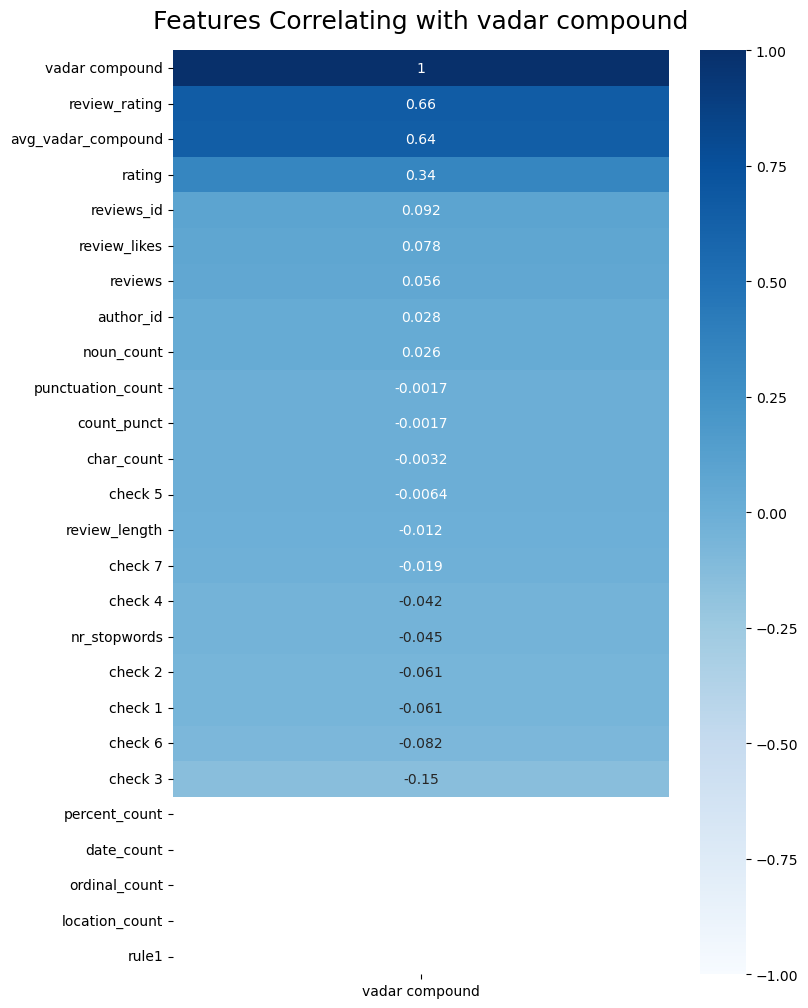

In [565]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['vadar compound']].sort_values(by='vadar compound', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Features Correlating with vadar compound', fontdict={'fontsize':18}, pad=16);

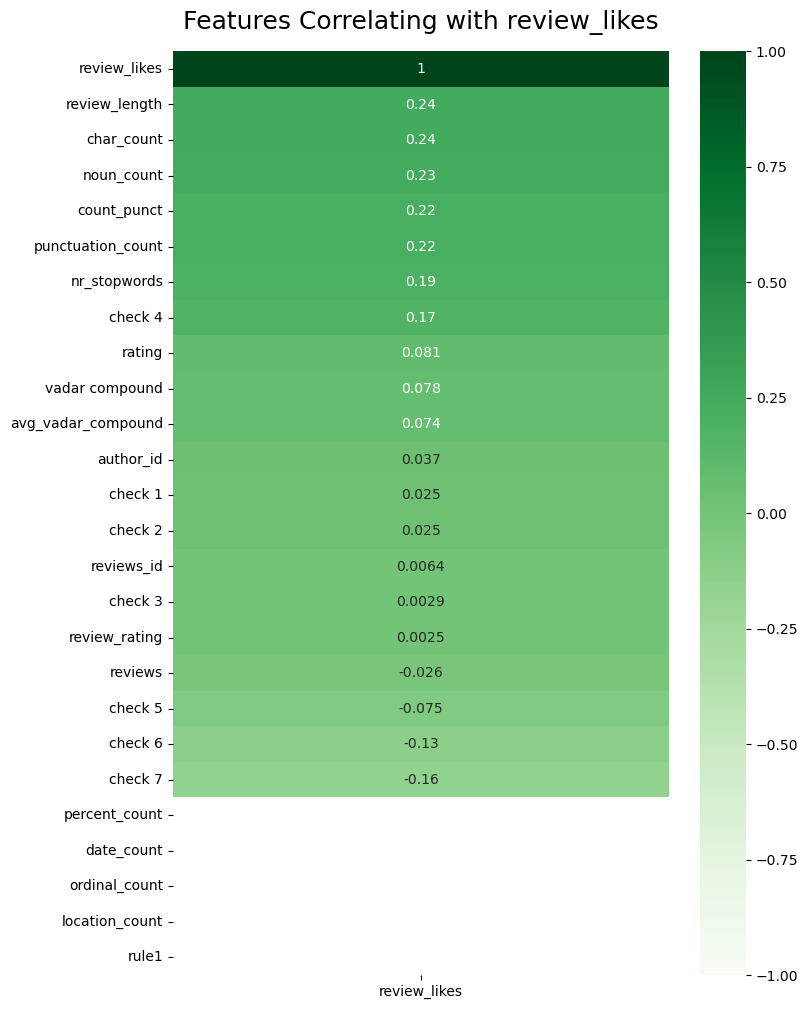

In [564]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['review_likes']].sort_values(by='review_likes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Greens')
heatmap.set_title('Features Correlating with review_likes', fontdict={'fontsize':18}, pad=16);

In [559]:
df['rating'].value_counts()

4.7    235
4.4    200
4.1    200
4.6    150
4.5    101
4.2    100
4.3    100
3.9     51
4.8     51
3.5     37
3.2     34
3.3     28
3.0     12
3.1     12
3.4      9
3.8      3
2.9      1
2.8      1
3.6      1
3.7      1
4.9      1
Name: rating, dtype: int64

Text(0, 0.5, 'Density')

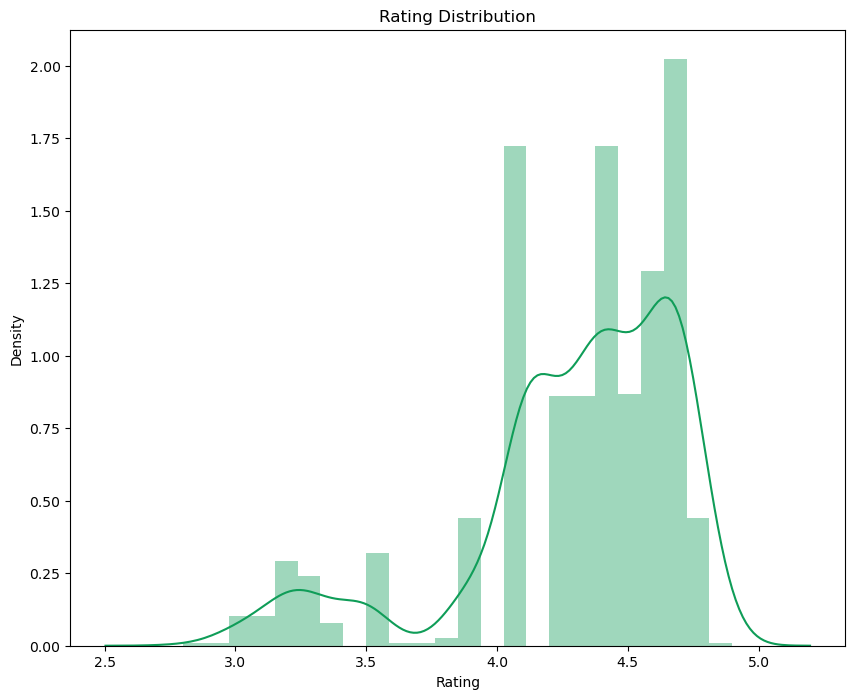

In [296]:
fig = plt.figure(figsize=(10, 8))# rating distribution with google green colour
sns.distplot(df["rating"], color = '#0F9D58')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Density')

In [382]:
df.review_text.astype(str)

0       This place is absolutely outstanding. It was a...
1       Excellent dinner experience in the city center...
2       Outstanding from start to finish!\n\nEnjoyed a...
3       Called in on a Saturday without a booking with...
4       We went today for lunch, food was amazing! The...
                              ...                        
1323    Probably the best vegan burger I've ever had. ...
1324    Cozy little restaurant with really tasty food....
1325    Very cosy, intimate restaurant. Lovely staff, ...
1326    So many mussels, and for cheap too! They were ...
1327    Portions are huge and their prices are so good...
Name: review_text, Length: 1328, dtype: object

In [298]:
#pip install WordCloud

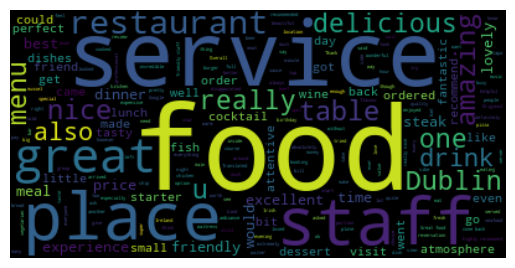

In [299]:
#Creating Stopwords list
from wordcloud import WordCloud
from nltk.corpus import stopwords

stopwords=set(stopwords.words('english'))
stopwords.update(["br","href", "good",'Translated' 'by' 'Google','of','the','is'])
textt = " ".join(review for review in df.review_text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df.loc[0, 'review_text'][-50:]

In [384]:
#counting nr. of stopwords per review
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['nr_stopwords'] = df['review_text'].apply(lambda x: len(set(x.split()) & stop_words))

In [385]:
df['nr_stopwords'].describe()#assessing nr. of stopwords in dataset

count    1328.000000
mean       13.731175
std         8.906406
min         0.000000
25%         7.000000
50%        12.000000
75%        18.000000
max        54.000000
Name: nr_stopwords, dtype: float64

In [386]:
import string 
# Storing the sets of punctuation in variable result 
result = string.punctuation 
print(result)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [387]:
from collections import Counter
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

df['count_punct'] = df.review_text.apply(lambda s: count(s, string.punctuation))
accumulate = lambda l1,l2: [x for x in l1 if x in l2]

df['acc_punct_list'] = df.review_text.apply(lambda s: accumulate(s, string.punctuation))
# accumulate the punctuation marks of each line in a dict and transpose each element into dataframe columns
df['acc_punct_dict'] = df.review_text.apply(lambda s: {k: v for k, v in Counter(s).items() if k in string.punctuation} if any(char in string.punctuation for char in s) else {})

In [388]:
df_punct = df.acc_punct_dict.apply(pd.Series)

In [389]:
df_punct

,.,",",',(,),!,:,-,+,;,...,%,*,#,?,~,@,\,$,<,>
0,6.0,4.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,NaN,NaN,1.0,1.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,4.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,3.0,2.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1324,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325,6.0,8.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1326,2.0,3.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

In [390]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
from nltk.tag import pos_tag_sents#importing tagger for POS speech tagging
brown.words()

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [391]:
df['tokenized_review'] = df.apply(lambda row: nltk.word_tokenize(row['review_text']), axis=1)
df['review_length'] = df.apply(lambda row: len(row['tokenized_review']), axis=1)
df.head()
#https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da
#count nr. of adjectives and nouns in review 

,name,place_id,reviews,rating,author_id,review_text,owner_answer,review_link,review_rating,review_likes,reviews_id,nr_stopwords,count_punct,acc_punct_list,acc_punct_dict,tokenized_review,review_length
0,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,This place is absolutely outstanding. It was a...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,-6.370000e+18,26,13,"[., ., ,, ., ,, ., ,, ., ,, ', (, ), .]","{'.': 6, ',': 4, ''': 1, '(': 1, ')': 1}","[This, place, is, absolutely, outstanding, ., ...",116
1,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.110000e+20,Excellent dinner experience in the city center...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.0,-6.370000e+18,12,4,"[., ., ., .]",{'.': 4},"[Excellent, dinner, experience, in, the, city,...",52
2,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.150000e+20,Outstanding from start to finish!\n\nEnjoyed a...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.0,-6.370000e+18,24,14,"[!, ., ., ., ., (, ), !, !, !, ., ., !, !]","{'!': 6, '.': 6, '(': 1, ')': 1}","[Outstanding, from, start, to, finish, !, Enjo...",134
3,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.070000e+20,Called in on a Saturday without a booking with...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,-6.370000e+18,18,5,"[., ., ., ., .]",{'.': 5},"[Called, in, on, a, Saturday, without, a, book...",79
4,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.070000e+20,"We went today for lunch, food was amazing! The...",NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,-6.370000e+18,12,8,"[,, !, ., (, ), ,, ,, ,]","{',': 4, '!': 1, '.': 1, '(': 1, ')': 1}","[We, went, today, for, lunch, ,, food, was, am...",61


In [ ]:
!python -m spacy download en_core_web_sm -q

In [418]:
df['tokenized_review'].head()

0    [This, place, is, absolutely, outstanding, ., ...
1    [Excellent, dinner, experience, in, the, city,...
2    [Outstanding, from, start, to, finish, !, Enjo...
3    [Called, in, on, a, Saturday, without, a, book...
4    [We, went, today, for, lunch, ,, food, was, am...
Name: tokenized_review, dtype: object

In [419]:
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [422]:
df['tokenized_review'].head()

0    [This, place, is, absolutely, outstanding, ., ...
1    [Excellent, dinner, experience, in, the, city,...
2    [Outstanding, from, start, to, finish, !, Enjo...
3    [Called, in, on, a, Saturday, without, a, book...
4    [We, went, today, for, lunch, ,, food, was, am...
Name: tokenized_review, dtype: object

In [421]:
df['tokenized_review'].astype(str)
df['tokenized_review'] = df['tokenized_review'].apply(remove_stopwords)

TypeError: expected string or bytes-like object

In [394]:
import spacy
from spacy import displacy
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
from spacy.lang.en.examples import sentences 

nlp = spacy.load("en_core_web_sm")
import en_core_web_sm

In [395]:
df['review_text'].astype(str)
doc = df['review_text'].apply(nlp)#applying spacy and background pipeline will return the objects.

In [396]:
# Function to process each text and extract named entities
def get_named_entities(text):
    doc = nlp(text)
    return [(X.text, X.label_) for X in doc.ents]

# Apply the function to 'review_text' column and store the results in a new column 'named_entities'
df['named_entities'] = df['review_text'].apply(get_named_entities)
#reate a function get_named_entities that processes each text using spaCy and returns a
#list of named entities and their labels. Then, we use the apply method to apply this function 
#to each element in the 'review_text' column and store the results in a new column called 'named_entities'.
#Now, you can access the named entities for each text in the DataFrame.



In [397]:
print(df['named_entities'].head())

0                                                   []
1                   [(Dublin, GPE), (three, CARDINAL)]
2    [(Fire.\n\n, FAC), (3, CARDINAL), (Two, CARDIN...
3                                   [(Saturday, DATE)]
4       [(today, DATE), (Alex, PERSON), (Greece, GPE)]
Name: named_entities, dtype: object


In [398]:
displacy.render(nlp(str(df['named_entities'])), jupyter=True, style='ent')
#generate the raw markup.

In [399]:
displacy.render(nlp(str(df['named_entities'])), style='dep', jupyter = True, options = {'distance': 120})
#Using spaCy’s built-in displaCy visualizer, here’s what the above sentence and its dependencies look like

In [400]:
# extract part-of-speech and lemmatize
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(df['named_entities'])) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('0', 'X', '0'),
 ('                                                     ',
  'SPACE',
  '                                                     '),
 ('[', 'X', '['),
 (']', 'X', ']'),
 ('\n', 'SPACE', '\n'),
 ('1', 'NUM', '1'),
 ('                     ', 'SPACE', '                     '),
 ('[', 'X', '['),
 ('Dublin', 'PROPN', 'Dublin'),
 ('GPE', 'PROPN', 'GPE'),
 ('CARDINAL', 'PROPN', 'CARDINAL'),
 ('\n', 'SPACE', '\n'),
 ('2', 'NUM', '2'),
 ('      ', 'SPACE', '      '),
 ('[', 'X', '['),
 ('Fire.\\n\\n', 'PROPN', 'Fire.\\n\\n'),
 ('FAC', 'PROPN', 'FAC'),
 ('3', 'NUM', '3'),
 ('CARDINAL', 'PROPN', 'CARDINAL'),
 ('CARDIN', 'PROPN', 'CARDIN'),
 ('\n', 'SPACE', '\n'),
 ('3', 'NUM', '3'),
 ('                                     ',
  'SPACE',
  '                                     '),
 ('[', 'X', '['),
 ('Saturday', 'PROPN', 'Saturday'),
 ('DATE', 'PROPN', 'DATE'),
 ('\n', 'SPACE', '\n'),
 ('4', 'NUM', '4'),
 ('         ', 'SPACE', '         '),
 ('today', 'NOUN', 'today'),
 ('DATE', 'NO

In [401]:
dict([(str(x), x.label_) for x in nlp(str(df['named_entities'])).ents])
#using a list comprehension to extract token information (orthographic 
#representation, part-of-speech tag, and lemma) from a spaCy Doc object
#output is a list of tuples, each containing the orthographic representation,
#part-of-speech tag, and lemma of the tokens

{'Dublin': 'GPE',
 'GPE': 'ORG',
 'three': 'CARDINAL',
 'CARDINAL': 'ORG',
 '2       ': 'CARDINAL',
 'Fire.\\n\\n, FAC': 'ORG',
 '3': 'CARDINAL',
 'Two': 'CARDINAL',
 '3                                      ': 'CARDINAL',
 'Saturday': 'DATE',
 '4          ': 'PERCENT',
 'today': 'DATE',
 'Greece': 'GPE',
 '1323': 'DATE',
 '15': 'CARDINAL',
 'these days': 'DATE',
 'Earth': 'LOC',
 'LOC': 'ORG',
 '1324': 'DATE',
 'Cozy': 'PERSON',
 'Galway': 'ORG',
 'shank': 'ORG',
 'ORG': 'ORG',
 'Ireland': 'GPE',
 '1327': 'DATE',
 'Basil': 'PERSON',
 'Length': 'PERSON',
 '1328': 'DATE'}

In [402]:
for entities in df['named_entities']:
    print(entities)

[]
[('Dublin', 'GPE'), ('three', 'CARDINAL')]
[('Fire.\n\n', 'FAC'), ('3', 'CARDINAL'), ('Two', 'CARDINAL'), ('Dawson St', 'PERSON'), ('evening', 'TIME')]
[('Saturday', 'DATE')]
[('today', 'DATE'), ('Alex', 'PERSON'), ('Greece', 'GPE')]
[('the end of the night', 'DATE'), ('two', 'CARDINAL'), ('two', 'CARDINAL')]
[('Leonardo Bueno', 'PERSON'), ('dessert', 'PERSON'), ('the lemmon sorbet', 'PERSON'), ('irish', 'NORP'), ('about a day', 'DATE'), ('Dublin', 'GPE')]
[('this evening', 'TIME'), ('this evening', 'TIME'), ('17:30', 'TIME')]
[('Level', 'PERSON'), ('Dublin', 'GPE'), ('6', 'CARDINAL'), ('Saturday', 'DATE'), ('40€', 'QUANTITY'), ('3', 'CARDINAL'), ('the Rib Eye', 'ORG')]
[('Thursday', 'DATE'), ('the day before', 'DATE'), ('3', 'CARDINAL'), ('Connemara', 'GPE'), ('Irish', 'NORP'), ('Mango Caipirinha', 'PERSON'), ('Grafton', 'ORG'), ("St. Stephen's Green", 'GPE')]
[('dublin', 'GPE'), ('2', 'CARDINAL'), ('60 euro', 'QUANTITY'), ('3', 'CARDINAL'), ('🍞', 'ORG'), ('2', 'CARDINAL'), ('14', 

In [ ]:
displacy.render(doc, jupyter=True, style='ent')
#Running this code will display a visual representation
#of the named entities detected in the 'article'. Each entity will be highlighted with its respective entity label. 

In [403]:
#counting details per review, nouns, date, numbers,locations

def count_nouns(review_text):
    doc = nlp(review_text)
    noun_count = sum(1 for token in doc if token.pos_ == "NOUN")
    return noun_count

# Apply the count_nouns function to the 'text_column' and save the counts to a new column
df['noun_count'] = df['review_text'].apply(count_nouns)

In [404]:
#counting details per review, nouns, date, numbers,locations

def count_percent(review_text):
    doc = nlp(review_text)
    percent_count = sum(1 for token in doc if token.pos_ == "PERCENT")
    return percent_count

# Apply the count_nouns function to the 'text_column' and save the counts to a new column
df['percent_count'] = df['review_text'].apply(count_percent)

In [405]:
def count_date(review_text):
    doc = nlp(review_text)
    date_count = sum(1 for token in doc if token.pos_ == "DATE")
    return date_count
df['date_count'] = df['review_text'].apply(count_date)

In [406]:
def count_ordinal(review_text):
    doc = nlp(review_text)
    ordinal_count = sum(1 for token in doc if token.pos_ == "ORDINAL")
    return ordinal_count
df['ordinal_count'] = df['review_text'].apply(count_ordinal)

In [407]:
def count_location(review_text):
    doc = nlp(review_text)
    location_count = sum(1 for token in doc if token.pos_ == "GPE")
    return location_count
df['location_count'] = df['review_text'].apply(count_location)

In [408]:
# Function to check if the sum of the four columns is less than 5, checking details of review
def check_sum(row):
    return 1 if row['noun_count'] + row['date_count'] + row['ordinal_count'] + row['location_count'] + row['percent_count']  < 10 else 0

# Apply the check_sum function to each row and create the 'new_column'
df['check 7'] = df.apply(check_sum, axis=1)

In [ ]:
df.head()

In [409]:
df['check 7'].value_counts()

0    696
1    632
Name: check 7, dtype: int64

In [462]:
#Count how many times each term shows up in each review
def text_vectorizing_process(string):
    return [word for word in string.split()]

In [463]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(
    analyzer=text_vectorizing_process,
    ngram_range=(1, 2),
    min_df=0.005,
    max_df=0.9
)
cvec.fit(data_c['review_text'])

CountVectorizer(analyzer=<function text_vectorizing_process at 0x00000221B5725C60>,
                max_df=0.9, min_df=0.005, ngram_range=(1, 2))

In [464]:
# Get the total n-gram count
len(cvec.vocabulary_)

12

In [412]:
# Creating the bag-of-words representation , Term counts for each review
cvec_counts = cvec.transform(data_c['review_text'])
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (1328, 12)
nonzero count: 7010
sparsity: 43.99%


In [466]:
# Instantiating the TfidfTransformer
#Calculate the weights for each term in each review
transformer = TfidfTransformer()

# Fitting and transforming n-grams
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<1328x12 sparse matrix of type '<class 'numpy.float64'>'
	with 7010 stored elements in Compressed Sparse Row format>

In [467]:

# Convert the transformed weights to a dense numpy array
transformed_weights = transformed_weights.toarray()

# Get the vocabulary (list of n-grams)
vocab = cvec.get_feature_names_out()

# Create a DataFrame with the transformed weights
model = pd.DataFrame(transformed_weights, columns=vocab)

# Add columns for keyword, max weight, and sum of weights
model['Keyword'] = model.idxmax(axis=1)  # Identify the keyword with the highest weight
model['Max'] = model.max(axis=1)  # Maximum weight for each row (document)
model['Sum'] = model.drop(columns=['Max', 'Keyword']).sum(axis=1)  # Sum of weights (excluding max)

# Display the first 10 rows of the DataFrame
print(model.head(10))

          b         h        j         k         q         v         w  \
0  0.490418  0.663510  0.00000  0.223346  0.203985  0.386117  0.209856   
1  0.238425  0.576030  0.00000  0.407188  0.000000  0.351970  0.127531   
2  0.390830  0.323739  0.13716  0.444979  0.116116  0.384636  0.597290   
3  0.304449  0.735543  0.00000  0.519945  0.000000  0.149812  0.244271   
4  0.308965  0.149291  0.00000  0.351771  0.000000  0.608137  0.495787   
5  0.432097  0.574166  0.00000  0.122991  0.112329  0.425249  0.404469   
6  0.468134  0.633361  0.00000  0.319796  0.194716  0.184286  0.300481   
7  0.684410  0.220470  0.00000  0.389617  0.000000  0.392913  0.366085   
8  0.619210  0.478720  0.00000  0.282000  0.000000  0.487518  0.264968   
9  0.510486  0.678328  0.00000  0.217955  0.132708  0.376797  0.136527   

          x         z    á    è    é Keyword       Max       Sum  
0  0.000000  0.186079  0.0  0.0  0.0       h  0.663510  2.363311  
1  0.552624  0.000000  0.0  0.0  0.0       h  0.576

In [415]:
# Merging td-idf weight matrix with original DataFrame data2
model = pd.merge(cleaned_text, model, left_index=True, right_index=True)
# Check the merged dataset
model.head(10)

,review_text,b,h,j,k,q,v,w,x,z,á,è,é,Keyword,Max,Sum
0,h p l c e b l u e l u n n g w b r h n n e r f ...,0.490418,0.663510,0.00000,0.223346,0.203985,0.386117,0.209856,0.000000,0.186079,0.0,0.0,0.0,h,0.663510,2.363311
1,e x c e l l e n n n e r e x p e r e n c e n h ...,0.238425,0.576030,0.00000,0.407188,0.000000,0.351970,0.127531,0.552624,0.000000,0.0,0.0,0.0,h,0.576030,2.253769
2,u n n g f r r f n h e n j e w n e r f u l e v ...,0.390830,0.323739,0.13716,0.444979,0.116116,0.384636,0.597290,0.086273,0.000000,0.0,0.0,0.0,w,0.597290,2.481023
3,c l l e n n u r w h u b k n g w h u g h e r w ...,0.304449,0.735543,0.00000,0.519945,0.000000,0.149812,0.244271,0.117609,0.000000,0.0,0.0,0.0,h,0.735543,2.071630
4,w e w e n f r l u n c h f w z n g h e p l c e ...,0.308965,0.149291,0.00000,0.351771,0.000000,0.608137,0.495787,0.238707,0.293076,0.0,0.0,0.0,v,0.608137,2.445734
5,u c h g r e e x p e r e n c e n h e f w f c u ...,0.432097,0.574166,0.00000,0.122991,0.112329,0.425249,0.404469,0.333840,0.000000,0.0,0.0,0.0,h,0.574166,2.405141
6,z n g p l c e n c e h e r e c e p n w h r e c ...,0.468134,0.633361,0.00000,0.319796,0.194716,0.184286,0.300481,0.289345,0.177624,0.0,0.0,0.0,h,0.633361,2.567743
7,h u b n n n e h e r e h e v e n n g h v e l w ...,0.684410,0.220470,0.00000,0.389617,0.000000,0.392913,0.366085,0.176259,0.108202,0.0,0.0,0.0,b,0.684410,2.337957
8,g r e f n v e r g e r v c e n e l k e h g h e ...,0.619210,0.478720,0.00000,0.282000,0.000000,0.487518,0.264968,0.000000,0.000000,0.0,0.0,0.0,b,0.619210,2.132416
9,b e u f u l r e u r n w h e l l r e r v c e n ...,0.510486,0.678328,0.00000,0.217955,0.132708,0.376797,0.136527,0.197202,0.121059,0.0,0.0,0.0,h,0.678328,2.371061


In [416]:
#top 30 frequently occured words in the review
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'Term': cvec.get_feature_names_out(), 'Occurrences': occ})
counts_df.sort_values(by='Occurrences', ascending=False).head(30)

,Term,Occurrences
1,h,5510
0,b,4265
5,v,3780
6,w,3279
3,k,2907
7,x,993
8,z,591
4,q,399
2,j,254
11,é,34


In [417]:
#op 30 weighted occured words in the review
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'Term': cvec.get_feature_names_out(), 'Weight': weights})
weights_df.sort_values(by='Weight', ascending=False).head(30)

,Term,Weight
1,h,0.436481
0,b,0.354487
5,v,0.337535
6,w,0.285395
3,k,0.255809
7,x,0.137668
8,z,0.102710
4,q,0.069297
2,j,0.047981
11,é,0.007200


In [ ]:
df['review_text'] = df['review_text'].astype(str)
#df['review_text'] = df['review_text'].str.lower()

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['review_text'] = df['review_text'].apply(lambda x: stem_words(x))

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["review_text"] = df["review_text"].apply(lambda text: lemmatize_words(text))

In [ ]:
df['review_text'].head()

In [ ]:
#df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

In [ ]:
plt.figure(figsize=(8,10))
sns.countplot(y='review_text',data=df,order=df.review_text.value_counts().iloc[:10].index)

In [425]:
#after removing punction, readding it in as indicator
df['review_text'].replace({'!': ' exclamation ','?': ' question_mark ',
                           '\'' : ' quotation ','\'': 'quotation'},inplace=True)
df['review_text']

0       This place is absolutely outstanding. It was a...
1       Excellent dinner experience in the city center...
2       Outstanding from start to finish!\n\nEnjoyed a...
3       Called in on a Saturday without a booking with...
4       We went today for lunch, food was amazing! The...
                              ...                        
1323    Probably the best vegan burger I've ever had. ...
1324    Cozy little restaurant with really tasty food....
1325    Very cosy, intimate restaurant. Lovely staff, ...
1326    So many mussels, and for cheap too! They were ...
1327    Portions are huge and their prices are so good...
Name: review_text, Length: 1328, dtype: object

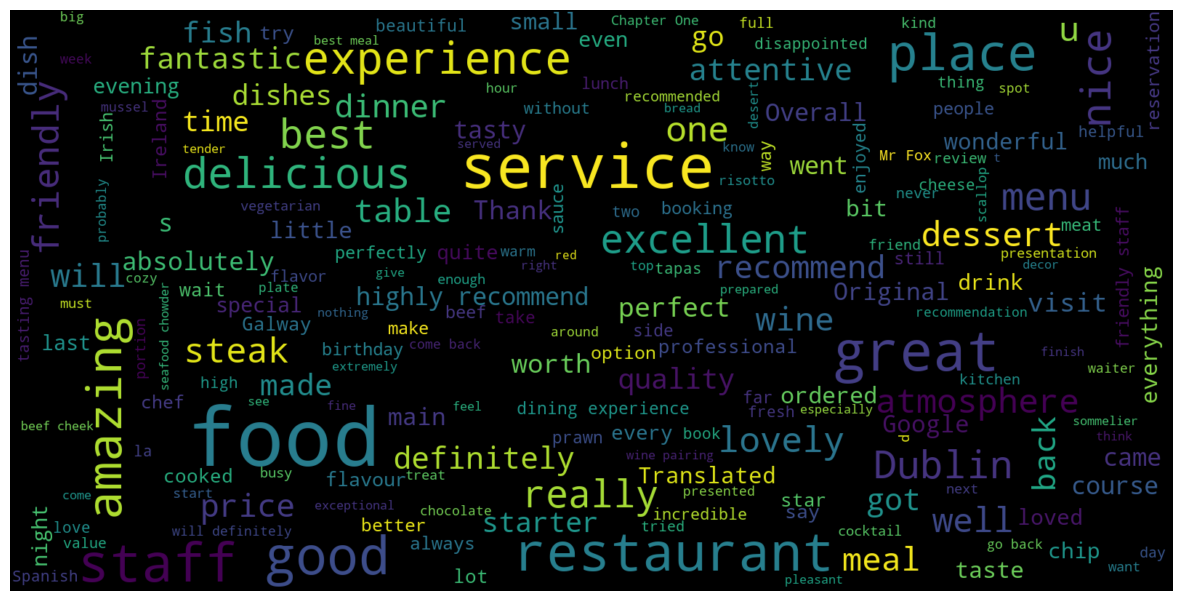

In [426]:

#repeat for positive and negative ratings
consolidated=' '.join(word for word in df['review_text'][df['rating']>4.5].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

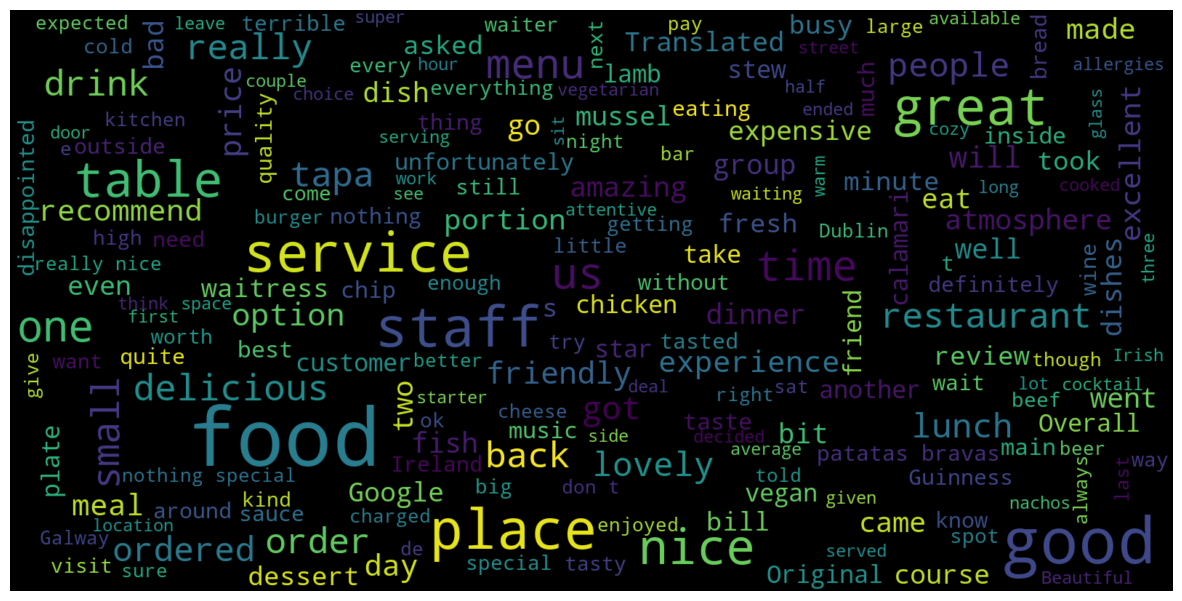

In [427]:

#repeat for positive and negative ratings
consolidated=' '.join(word for word in df['review_text'][df['rating']<4].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
nltk.download('punkt')

In [ ]:
df['review_text'].astype(str)

In [428]:
from collections import Counter

def counter(text):
    cnt=Counter()
    for msgs in text:
        for msg in msgs:
            cnt[msg] += 1
    return cnt

text_cnt=counter(df['review_text'])

In [429]:
text_cnt.most_common(10)

[(' ', 77752),
 ('e', 45999),
 ('a', 29807),
 ('t', 29522),
 ('o', 24949),
 ('i', 22388),
 ('n', 21468),
 ('s', 21180),
 ('r', 21162),
 ('d', 15580)]

<Axes: xlabel='Counts', ylabel='Words'>

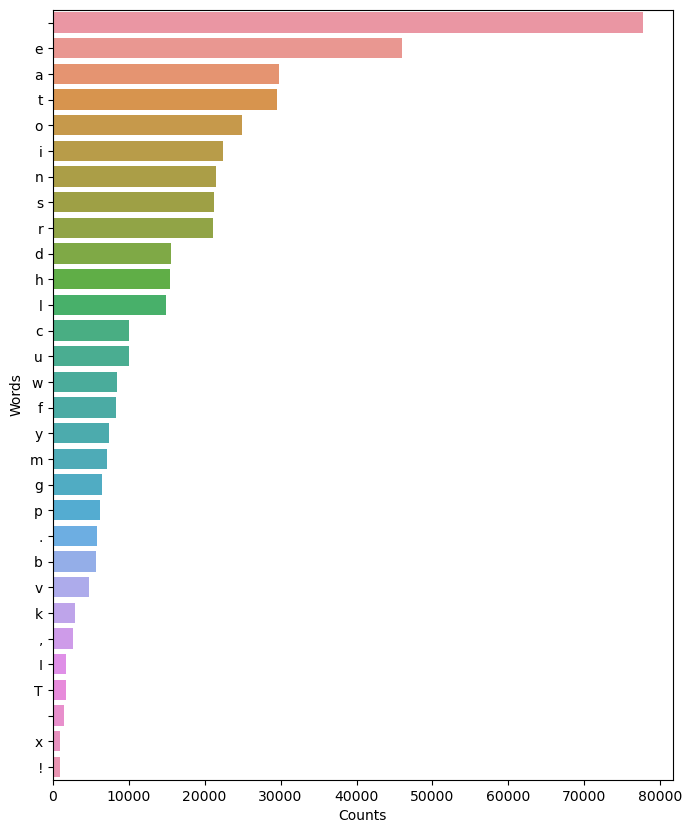

In [430]:
common_words= text_cnt.most_common(30)
common_words=pd.DataFrame(common_words, columns=['Words','Counts'])
plt.figure(figsize=(8,10))
sns.barplot(y='Words', x='Counts', data=common_words)

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

In [ ]:
#positive speech tagging
reviewText = df['review_text'].astype(str)
nltk.download('averaged_perceptron_tagger')
text = reviewText[8]
word_tokens = nltk.word_tokenize(text)
pos_tags = nltk.pos_tag(word_tokens)
for token in text:
    print(nltk.pos_tag([token]))
tig= nltk.pos_tag([token])

In [ ]:
#named entity recognition, system identifies which word is a person’s name, location, etc.
from nltk import ne_chunk# tokenize and POS Tagging before doing chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')
#importing chunk library from nltk
#text = reviewText[8]
#token = word_tokenize(text)

In [ ]:
pip install svgling

In [ ]:
#tags = nltk.pos_tag(token)
#chunking picking up individual pieces of info and grouping into bigger pieces ie grouping words/tokens into chunks
chunk = ne_chunk(tig)
chunk

In [ ]:
reg = "NP: {<DT>?<JJ>*<NN>}"
a = nltk.RegexpParser(reg)
result = a.parse(tig)
print(result)


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
#pip install pandarallel
import nltk
nltk.download('vader_lexicon')
df['review_text'].astype(str)


In [471]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_i = SentimentIntensityAnalyzer()

def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return sent_i.polarity_scores(text)['compound']

# create new column for vadar compound sentiment score
df['vadar compound'] = df['review_text'].apply(vadar_sentiment)

def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

# new col with vadar sentiment label based on vadar compound score
df['vadar sentiment'] = df['vadar compound'].apply(categorise_sentiment)


In [470]:
df.head()

,name,place_id,reviews,rating,author_id,review_text,owner_answer,review_link,review_rating,review_likes,...,check 1,check 2,avg_vadar_compound,check 3,punctuation_count,check 4,check 5,char_count,check 6,label
0,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,This place is absolutely outstanding. It was a...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,...,1,1,0.764273,0,13,1,1,584,0,fake
1,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,The dining environment with friends before Chr...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4.0,0.0,...,0,0,0.764273,0,11,1,1,376,0,true
2,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,"Went for my wife's birthday, food was good eno...",NaN,https://www.google.com/maps/reviews/data=!4m8!...,2.0,2.0,...,0,0,0.764273,0,6,0,1,186,0,true
3,NoLIta,ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg,2277,4.1,1.010000e+20,Great buzz the night we went.\nReasonable pric...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4.0,0.0,...,0,0,0.764273,0,7,0,1,262,0,true
4,NoLIta,ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg,2277,4.1,1.010000e+20,"We have great time, good dinner, Perfect music .",NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,...,0,0,0.764273,0,3,0,1,48,1,true


In [472]:
#generate summary statistics
df[['vadar compound']].describe()

,vadar compound
count,1328.000000
mean,0.732627
std,0.439995
min,-0.973800
25%,0.764325
50%,0.916700
75%,0.962800
max,0.999300


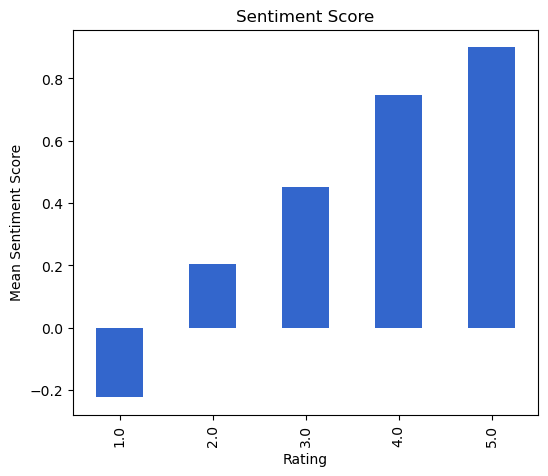

In [473]:
google_colors = ["#3366cc", "#dc3912", "#ff9900", "#109618", "#990099", "#0099c6", "#dd4477",
                 "#66aa00", "#b82e2e", "#316395", "#994499", "#22aa99", "#aaaa11", "#6633cc",
                 "#e67300", "#8b0707", "#651067", "#329262", "#5574a6", "#3b3eac"]

# Set the color palette for Seaborn
sns.set_palette(google_colors)

# Generate mean of sentiment_score by period
dfg = df.groupby('review_rating')['vadar compound'].mean()

# Create a bar plot
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Rating', figsize=(6, 5))
plt.show()

In [474]:
df['vadar sentiment'].value_counts()

positive    1199
negative     105
neutral       24
Name: vadar sentiment, dtype: int64

In [ ]:
positive_consolidated=' '.join(word for word in df['review_text'][df['vadar sentiment']=='positive'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(positive_consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
negative_consolidated=' '.join(word for word in df['review_text'][df['vadar sentiment']=='negative'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(negative_consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df['review_count']=df['author_title'].value_counts()#reviewers submitting >1 review
x=review_count.value_counts()
x

In [476]:
df['author_id'].value_counts()

1.160000e+20    74
1.130000e+20    64
1.010000e+20    63
1.150000e+20    59
1.170000e+20    58
                ..
1.036840e+20     1
1.154330e+20     1
1.143670e+20     1
1.162380e+20     1
1.100160e+20     1
Name: author_id, Length: 335, dtype: int64

In [436]:

df['name'].value_counts()

The Quay Street Kitchen                         200
Restaurant SIX                                  100
The Vintage Kitchen                              78
NoLIta                                           50
Mr Fox                                           50
Gallaghers Boxty House                           50
Luigi Malones Dublin                             50
The Millstone Restaurant                         50
Chapter One Restaurant                           50
FX Buckley Steakhouse Crow Street                50
The Winding Stair                                50
FIRE Steakhouse & Bar                            50
Flanagan's Bar & Restaurant                      50
Las Tapas De Lola                                50
Old Mill Restaurant                              50
SOLE Seafood & Grill                             50
The Church Café, Late Bar & Restaurant           50
Brasserie Sixty6 Restaurant                      50
The Market Bar Restaurant                        50
Fade Street 

In [437]:
# Calculate the count of reviews per author_id
reviews_per_author = df.groupby('author_id')['review_text'].count().reset_index()
reviews_per_author = reviews_per_author.rename(columns={'review_text': 'review_count'})

# Calculate the count of unique names of places reviewed per author_id
places_per_author = df.groupby('author_id')['name'].nunique().reset_index()
places_per_author = places_per_author.rename(columns={'name': 'count_of_places_reviewed'})


#The for loop iterates over the rows of the new_dataset dataframe using the iterrows() method. Inside the loop, we
#compare the 'count of names of places reviewed' with the 'count of reviews' for each row. 
#If the condition row['count of names of places reviewed'] is not equal to row['count of reviews'], there maybe be 
#multiple reviews for same place

# Add 'check 1' column using if-else statements, check if this person submits>1 review
df['check 1'] = 0
for index, row in new_dataset.iterrows():
    if row['review_count'] > 1:
        df.at[index, 'check 1'] = 1

 #Add 'check 2' column using if-else statements
df['check 2'] = 0
for index, row in new_dataset.iterrows():
    if row['count_of_places_reviewed'] != row['review_count']:
        df.at[index, 'check 2'] = 1


#check 1=1-author has submitted >1 review in dataset
#check2= 1-author has submitted multiple reviews for same place


In [438]:
print(df.head())

                    name                     place_id  reviews  rating  \
0  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
1  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
2  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
3  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
4  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   

      author_id                                        review_text  \
0  1.010000e+20  This place is absolutely outstanding. It was a...   
1  1.110000e+20  Excellent dinner experience in the city center...   
2  1.150000e+20  Outstanding from start to finish!\n\nEnjoyed a...   
3  1.070000e+20  Called in on a Saturday without a booking with...   
4  1.070000e+20  We went today for lunch, food was amazing! The...   

  owner_answer                                        review_link  \
0          NaN  https://www.google.com/maps/reviews/data=!4m8!...

In [439]:
# Step 1: Calculate the average of 'vadar_compound' per author
average_vadar_compound = df.groupby('author_id')['vadar compound'].mean().reset_index()
average_vadar_compound = average_vadar_compound.rename(columns={'vadar compound': 'avg_vadar_compound'})


In [334]:
average_vadar_compound['avg_vadar_compound'].astype(float)

0      0.785876
1     -0.657900
2      0.968000
3      0.645700
4      0.918200
         ...   
330    0.888500
331    0.806550
332    0.000000
333    0.972200
334    0.652600
Name: avg_vadar_compound, Length: 335, dtype: float64

In [440]:
# Step 1: Calculate the average of 'vadar_compound' per author
#average_vadar_compound = df.groupby('author_id')['vadar compound'].mean().reset_index()
#average_vadar_compound = average_vadar_compound.rename(columns={'vadar compound': 'avg_vadar_compound'})
df = pd.merge(df, average_vadar_compound, on='author_id')
# Step 3: Add 'check 3' column using if-else statements to check if avg_vadar_compound is extreme
df['check 3'] = 0
for index, row in df.iterrows():
    if row['avg_vadar_compound'] <= -0.6 or row['avg_vadar_compound'] >= 0.95:
        df.at[index, 'check 3'] = 1
print(df)

                         name                     place_id  reviews  rating  \
0       FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
1       FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
2       FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
3                      NoLIta  ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg     2277     4.1   
4                      NoLIta  ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg     2277     4.1   
...                       ...                          ...      ...     ...   
1323  The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365     4.7   
1324  The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365     4.7   
1325  The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365     4.7   
1326  The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365     4.7   
1327  The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365     4.7   

         author_id                                 

In [477]:
#he count_punctuation() function takes a string as input and returns
#the count of punctuation marks using a loop over each punctuation character. Then, we
#use the apply() function to apply this function to each element in the 'text_column' and create a new column 'punctuation_count' containing the results.

def count_punctuation(text):
    return sum(text.count(p) for p in string.punctuation)


# Apply the function to the 'text_column' to count punctuation marks in each element
df['punctuation_count'] = df['review_text'].apply(count_punctuation)
df['punctuation_count'].head()

0    13
1    11
2     6
3     7
4     3
Name: punctuation_count, dtype: int64

In [442]:
df['check 4'] = 0
for index, row in df.iterrows():
    if row['punctuation_count'] >10 :
        df.at[index, 'check 4'] = 1

In [339]:
df.head()

,name,place_id,reviews,rating,author_id,review_text,owner_answer,review_link,review_rating,review_likes,...,vadar sentiment,check 3,avg_vadar_compound_x,punctuation_count,check 4,check 5,avg_vadar_compound_y,avg_vadar_compound_x,avg_vadar_compound_y,avg_vadar_compound
0,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,This place is absolutely outstanding. It was a...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,...,positive,0,0.764273,13,1,1,0.764273,0.764273,0.764273,0.764273
1,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,The dining environment with friends before Chr...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4.0,0.0,...,positive,0,0.764273,11,1,1,0.764273,0.764273,0.764273,0.764273
2,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,"Went for my wife's birthday, food was good eno...",NaN,https://www.google.com/maps/reviews/data=!4m8!...,2.0,2.0,...,negative,0,0.764273,6,0,1,0.764273,0.764273,0.764273,0.764273
3,NoLIta,ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg,2277,4.1,1.010000e+20,Great buzz the night we went.\nReasonable pric...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4.0,0.0,...,positive,0,0.764273,7,0,1,0.764273,0.764273,0.764273,0.764273
4,NoLIta,ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg,2277,4.1,1.010000e+20,"We have great time, good dinner, Perfect music .",NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,...,positive,0,0.764273,3,0,1,0.764273,0.764273,0.764273,0.764273


In [323]:
df.head()

,name,place_id,reviews,rating,author_id,review_text,owner_answer,review_link,review_rating,review_likes,reviews_id,check 1,check 2,vadar compound,vadar sentiment,check 3,avg_vadar_compound,punctuation_count,check 4
0,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,This place is absolutely outstanding. It was a...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,-6.370000e+18,1,1,0.9745,positive,0,0.764273,13,1
1,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,The dining environment with friends before Chr...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4.0,0.0,-6.370000e+18,0,0,0.8020,positive,0,0.764273,11,1
2,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,"Went for my wife's birthday, food was good eno...",NaN,https://www.google.com/maps/reviews/data=!4m8!...,2.0,2.0,-6.370000e+18,0,0,-0.6847,negative,0,0.764273,6,0
3,NoLIta,ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg,2277,4.1,1.010000e+20,Great buzz the night we went.\nReasonable pric...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4.0,0.0,1.780000e+18,0,0,0.9370,positive,0,0.764273,7,0
4,NoLIta,ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg,2277,4.1,1.010000e+20,"We have great time, good dinner, Perfect music .",NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,1.780000e+18,0,0,0.8934,positive,0,0.764273,3,0


In [478]:
#check 5 for owner answer
#the condition pd.isna(df['Column1']) | (df['Column1'] == '') checks if 'Column1' is either NaN or an empty string. 
#If it is NaN or an empty string, the corresponding value in 'New_Column' will be 1. Otherwise, it will be 0. 
#The np.where() function efficiently applies this condition and assigns the values to the 'New_Column' in the DataFrame.

#This way, both empty strings and NaN values are considered when creating the 'New_Column'
df['check 5'] = np.where(pd.isna(df['owner_answer']) | (df['owner_answer'] == ''), 1, 0)

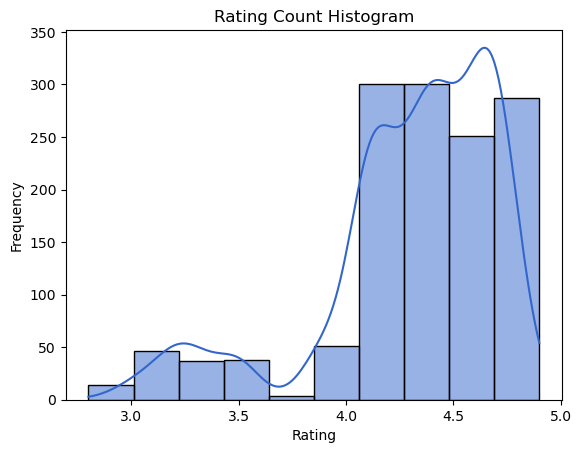

In [447]:
# Set the color palette for Seaborn
sns.set_palette(google_colors)

# Create the histogram with Google's classic colors
sns.histplot(data=df, x='rating', kde=True, bins=10)
plt.title('Rating Count Histogram')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [448]:
#check 6, checking review length
# Count the number of characters in 'Column1' and save to 'Character_Count'
df['char_count'] = df['review_text'].str.len()

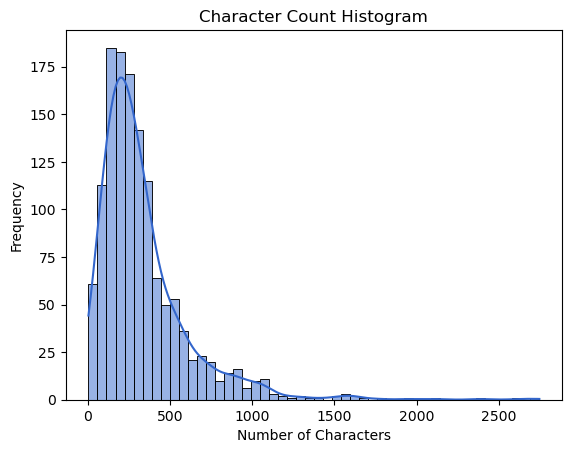

In [449]:
google_colors = ["#3366cc", "#dc3912", "#ff9900", "#109618", "#990099", "#0099c6", "#dd4477",
                 "#66aa00", "#b82e2e", "#316395", "#994499", "#22aa99", "#aaaa11", "#6633cc",
                 "#e67300", "#8b0707", "#651067", "#329262", "#5574a6", "#3b3eac"]

# Set the color palette for Seaborn
sns.set_palette(google_colors)

# Create the histogram with Google's classic colors
sns.histplot(data=df, x='char_count', kde=True, bins=50)
plt.title('Character Count Histogram')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

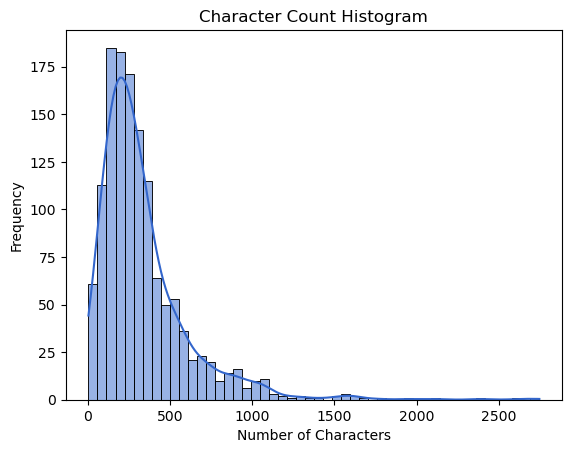

In [450]:
sns.histplot(data=df, x='char_count', kde=True, bins=50)  # 'kde=True' adds a Kernel Density Estimate plot
plt.title('Character Count Histogram')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.head()

In [452]:
#review's length is additionally a significant pointer to
#distinguish spam reviews. At the point when the feedback substance is excessively short, we
#figure the commentator did not consider the item's experience truly

df['char_count'] = df['char_count'].astype(int)

df['check 6'] = 0
for index, row in df.iterrows():
    if row['char_count'] <150 :
        df.at[index, 'check 6'] = 1

In [453]:
df['check 6'].value_counts()

0    1043
1     285
Name: check 6, dtype: int64

In [454]:
df['check 7']=df['check 7'] #adding in check 1 and 7 , detail/helpfullness count


In [479]:
# Function to check if the sum of the four columns is less than 5, checking details of review
def sum_check(row):
    return 'fake' if row['check 1'] + row['check 2'] + row['check 3'] + row['check 4'] + row['check 5'] + row['check 6'] + row['check 7'] > 3 else 'true'

# Apply the sum_check function to each row and create the 'fake' column
df['label'] = df.apply(sum_check, axis=1)

In [480]:
df['label'].value_counts()#29 values identified as meeting at least 3 of the 7 criteria (approximatly half)

true    1299
fake      29
Name: label, dtype: int64

In [481]:
dataset3=df[['name','rating','author_id','label','review_text']]#subsetting dataset for ML learning

In [ ]:
# List of column names to drop
#columns_to_drop = ['query', 'google_id','place_id', 'location_link', 'reviews_link','reviews_per_score', 'review_id',
                  #'acc_punct_dict', 'acc_punct_list','author_image', 'author_title', 'author_link', 'review_count_y']

# Drop the specified columns from the DataFrame
#dataset2.drop(columns=columns_to_drop, inplace=True)

In [482]:
dataset3['target'] = np.where(dataset3['label']=='fake', 1, 0)
#reate a new column called target to hold our target variable, and we’ll assign 
#the CG fake reviews with 1, and the real or OR reviews with 0.

In [365]:
X = dataset3['review_text']
y = dataset3['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)
#split into the training and test datasets we can use in our machine learning models. We’ll only be using one
#column of data here - the all_text data we preprocessed above. We’re defining the target column to y, so we’ll be training
#our model to predict that class value. We’ll split the data up in the usual manner using train_test_split().

In [ ]:
classifiers = {}
classifiers.update({"XGBClassifier": XGBClassifier(eval_metric='logloss',
                                                   objective='binary:logistic',
                                                   )})
classifiers.update({"CatBoostClassifier": CatBoostClassifier(silent=True)})
classifiers.update({"LinearSVC": LinearSVC()})
classifiers.update({"MultinomialNB": MultinomialNB()})
classifiers.update({"LGBMClassifier": LGBMClassifier()})
classifiers.update({"RandomForestClassifier": RandomForestClassifier()})
classifiers.update({"DecisionTreeClassifier": DecisionTreeClassifier()})
classifiers.update({"ExtraTreeClassifier": ExtraTreeClassifier()})
classifiers.update({"AdaBoostClassifier": AdaBoostClassifier()})
classifiers.update({"KNeighborsClassifier": KNeighborsClassifier()})
classifiers.update({"RidgeClassifier": RidgeClassifier()})
classifiers.update({"SGDClassifier": SGDClassifier()})
classifiers.update({"BaggingClassifier": BaggingClassifier()})
classifiers.update({"BernoulliNB": BernoulliNB()})
#create a model selection process that uses scikit-learn pipelines. Firstly, we’ll create a Python dictionary containing 
#the name and command to instantiate each of a range of different classification models, including XGBClassifier, 
#CatBoostClassifier, RandomForestClassifier, DecisionTreeClassifier, MultinomialNB, and many others.

In [ ]:
import time

dataframe3_models = pd.DataFrame(columns=['model', 'run_time', 'roc_auc', 'roc_auc_std'])

for key in classifiers:
    
    start_time = time.time()
    pipeline = Pipeline([("tfidf", TfidfVectorizer()), ("clf", classifiers[key] )])
    cv = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'roc_auc': cv.mean(),
           'roc_auc_std': cv.std(),
    }
    
    dataframe3_models = dataframe3_models.append(row, ignore_index=True)
    
dataframe3_models = dataframe3_models.sort_values(by='roc_auc', ascending=False)
#https://practicaldatascience.co.uk/machine-learning/how-to-build-a-fake-review-detection-model

In [ ]:
dataframe3_models

In [ ]:
bundled_pipeline = Pipeline([("tfidf", TfidfVectorizer()), 
                             ("clf", SGDClassifier())
                            ])
bundled_pipeline.fit(X_train, y_train)
y_pred = bundled_pipeline.predict(X_test)
#may be able to slightly increase performance through hyperparameter tuning

In [ ]:
accuracy_score = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)

In [ ]:
print('Accuracy:', accuracy_score)
print('Precision:', precision_score)
print('Recall:', recall_score)
print('ROC/AUC:', roc_auc_score)

In [484]:
df.head()

,name,place_id,reviews,rating,author_id,review_text,owner_answer,review_link,review_rating,review_likes,...,check 1,check 2,avg_vadar_compound,check 3,punctuation_count,check 4,check 5,char_count,check 6,label
0,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,This place is absolutely outstanding. It was a...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,...,1,1,0.764273,0,13,1,1,584,0,fake
1,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,The dining environment with friends before Chr...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4.0,0.0,...,0,0,0.764273,0,11,1,1,376,0,true
2,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,"Went for my wife's birthday, food was good eno...",NaN,https://www.google.com/maps/reviews/data=!4m8!...,2.0,2.0,...,0,0,0.764273,0,6,0,1,186,0,true
3,NoLIta,ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg,2277,4.1,1.010000e+20,Great buzz the night we went.\nReasonable pric...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4.0,0.0,...,0,0,0.764273,0,7,0,1,262,0,true
4,NoLIta,ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg,2277,4.1,1.010000e+20,"We have great time, good dinner, Perfect music .",NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,...,0,0,0.764273,0,3,0,1,48,1,true


In [504]:
# use unsupervised learning algorithms to divide the review data into clusters and perform detailed analysis of the clusters to categorize reviews as fake or real.
df1[['punctuation_count', 'review_likes', 'rating', 'avg_vadar_compound', 'char_count', 'check 7']] = df[['punctuation_count', 'review_likes', 'rating', 'avg_vadar_compound', 'char_count', 'check 7']]
df1.drop(['columns'], axis=1)
columns=['punctuation_count', 'review_likes', 'rating', 'avg_vadar_compound', 'char_count', 'check 7']

In [514]:
df1.dropna(inplace=True)

In [523]:

from sklearn.cluster import KMeans
inertia = []

#k=7
max_clusters = 7
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=60)
    kmeans.fit(df1[columns])
    inertia.append(kmeans.inertia_)

In [521]:
df.head()

,name,place_id,reviews,rating,author_id,review_text,owner_answer,review_link,review_rating,review_likes,...,check 1,check 2,avg_vadar_compound,check 3,punctuation_count,check 4,check 5,char_count,check 6,label
0,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,This place is absolutely outstanding. It was a...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,...,1,1,0.764273,0,13,1,1,584,0,fake
1,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,The dining environment with friends before Chr...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4.0,0.0,...,0,0,0.764273,0,11,1,1,376,0,true
2,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,"Went for my wife's birthday, food was good eno...",NaN,https://www.google.com/maps/reviews/data=!4m8!...,2.0,2.0,...,0,0,0.764273,0,6,0,1,186,0,true
3,NoLIta,ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg,2277,4.1,1.010000e+20,Great buzz the night we went.\nReasonable pric...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4.0,0.0,...,0,0,0.764273,0,7,0,1,262,0,true
4,NoLIta,ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg,2277,4.1,1.010000e+20,"We have great time, good dinner, Perfect music .",NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,...,0,0,0.764273,0,3,0,1,48,1,true


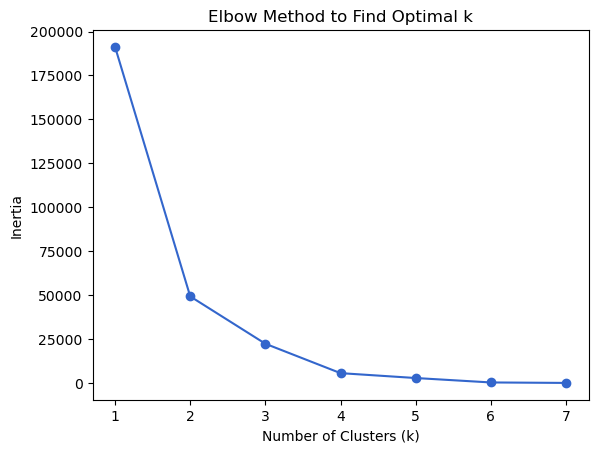

In [524]:

plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()
#The change in inertia becomes less significant from 4 clusters onwards.
#Using the Elbow Technique, we will select the optimal number of clusters to be = 4
#https://github.com/priyalbisht/fake-review-detection/blob/main/Final_FRD.ipynb

In [527]:

X = df1[columns]

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df1['cluster'] = kmeans.fit_predict(X)

In [529]:

df1['cluster']


0    3
2    2
1    1
3    1
Name: cluster, dtype: int64

In [530]:
df1['cluster'].value_counts()

0    3
2    2
1    1
3    1
Name: cluster, dtype: int64

In [531]:

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
print(cluster_centers)

   punctuation_count  review_likes    rating  avg_vadar_compound  char_count  \
0           5.666667      0.666667  4.233333            0.764273       219.0   
1          13.000000      0.000000  4.400000            0.764273       584.0   
2           3.000000      0.000000  4.100000            0.764273        83.5   
3          11.000000      0.000000  4.400000            0.764273       376.0   

    check 7  
0  0.666667  
1  0.000000  
2  1.000000  
3  0.000000  


In [532]:


cluster_analysis = df1.groupby('cluster').mean()
cluster_analysis

,punctuation_count,review_likes,rating,avg_vadar_compound,char_count,check 7,punctuation_count_missing,review_likes_missing,rating_missing,avg_vadar_compound_missing,char_count_missing,check 7_missing
cluster,,,,,,,,,,,,
0,5.666667,0.666667,4.233333,0.764273,219.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0
1,13.000000,0.000000,4.400000,0.764273,584.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,3.000000,0.000000,4.100000,0.764273,83.5,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,11.000000,0.000000,4.400000,0.764273,376.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [533]:
cluster_temp = cluster_analysis
cluster_temp['cluster_index'] = range(cluster_temp.shape[0])

In [534]:
cluster_temp

,punctuation_count,review_likes,rating,avg_vadar_compound,char_count,check 7,punctuation_count_missing,review_likes_missing,rating_missing,avg_vadar_compound_missing,char_count_missing,check 7_missing,cluster_index
cluster,,,,,,,,,,,,,
0,5.666667,0.666667,4.233333,0.764273,219.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0
1,13.000000,0.000000,4.400000,0.764273,584.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3.000000,0.000000,4.100000,0.764273,83.5,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
3,11.000000,0.000000,4.400000,0.764273,376.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3


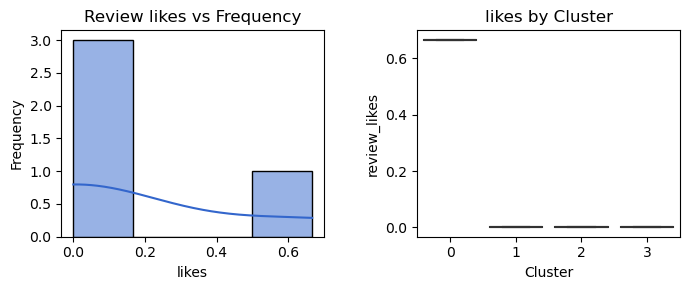

In [537]:

plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['review_likes'], kde=True)
plt.title('Review likes vs Frequency')
plt.xlabel('likes')
plt.ylabel('Frequency')

numerical_column = 'review_likes'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'likes by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()
#most reviews (70%) have les than 0.2 likes, while approx 30% have between 0.5 and 0.65 likes, cluster 0 has more likes
#, compared to other clusters, extreme values, largeely differeing from other clusters. Likes is another flag for 
#inauthenticy

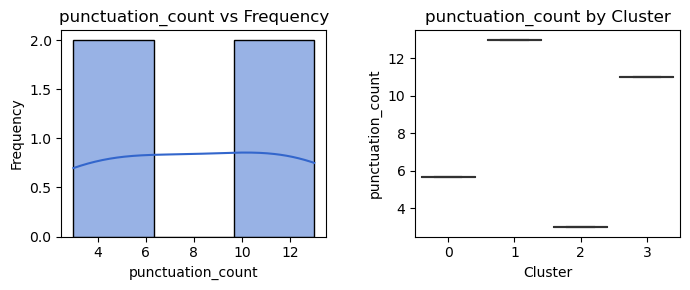

In [538]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['punctuation_count'], kde=True)
plt.title('punctuation_count vs Frequency')
plt.xlabel('punctuation_count')
plt.ylabel('Frequency')

numerical_column = 'punctuation_count'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'punctuation_count by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()
#punctuation count equally split. 50% of review have between 0-6 punctuation counts per review
#the other 50% have between 10 and 12 per review
#cluster 0 and cluster 2 have less punctuation compared to 1 and 3, which is another flag for inauthenticity

In [543]:

cluster_analysis['punctuation_count']

cluster
0     5.666667
1    13.000000
2     3.000000
3    11.000000
Name: punctuation_count, dtype: float64

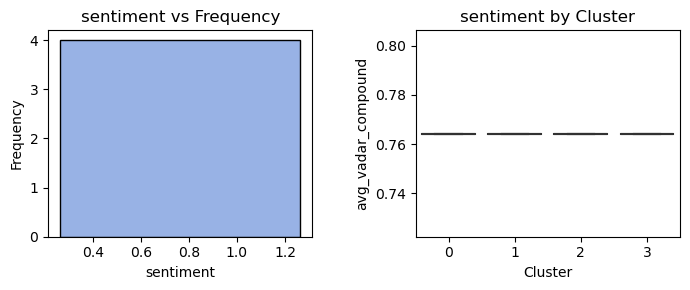

In [539]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['avg_vadar_compound'], kde=True)
plt.title('sentiment vs Frequency')
plt.xlabel('sentiment')
plt.ylabel('Frequency')

numerical_column = 'avg_vadar_compound'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'sentiment by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()
#no change in sentiment between clusters

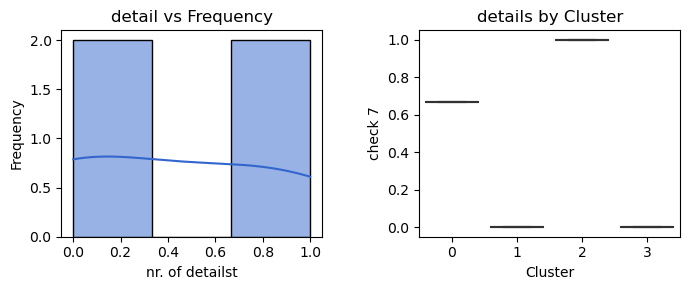

In [541]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['check 7'], kde=True)
plt.title('detail vs Frequency')
plt.xlabel('nr. of detailst')
plt.ylabel('Frequency')

numerical_column = 'check 7'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'details by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()
#cluster 0 and 3 contain most details, ie. nouns, dates, names, times. cluster 1 and 3 containing less

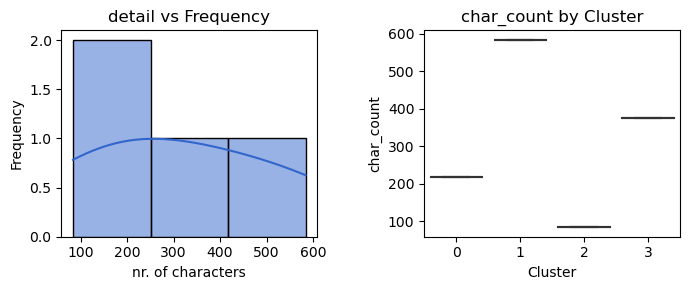

In [542]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['char_count'], kde=True)
plt.title('detail vs Frequency')
plt.xlabel('nr. of characters')
plt.ylabel('Frequency')

numerical_column = 'char_count'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'char_count by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()
#again 1 and 3 standing out as high character count which is a sign of inauthenticity

In [544]:

cluster_counts = cluster_temp['cluster_index'].value_counts()
total_reviews_in_cluster = cluster_counts.sum()
percentage_cluster_1 = (cluster_counts[1] / total_reviews_in_cluster) * 100
percentage_cluster_1
#cluster' - clusters of reviews based on review data.

25.0

In [547]:
df1[df1['cluster']==3]['rating'].value_counts()

4.4    1
Name: rating, dtype: int64

In [546]:
df1[df1['cluster']==1]['rating'].value_counts()
    #deduced cluster 1 and 3 contain some extreme values which are flagged for inauthenticity 
    #but rating level is not different to other clusters

4.4    1
Name: rating, dtype: int64

In [550]:
df1[df1['cluster']==2]['rating'].value_counts()

4.1    2
Name: rating, dtype: int64

In [549]:
cluster_analysis[['punctuation_count','review_likes',
                  'rating','avg_vadar_compound',
                  'char_count','check 7']]

,punctuation_count,review_likes,rating,avg_vadar_compound,char_count,check 7
cluster,,,,,,
0,5.666667,0.666667,4.233333,0.764273,219.0,0.666667
1,13.000000,0.000000,4.400000,0.764273,584.0,0.000000
2,3.000000,0.000000,4.100000,0.764273,83.5,1.000000
3,11.000000,0.000000,4.400000,0.764273,376.0,0.000000


In [ ]:
#on basis of analysis from pipeline of k means clustering, 
#clusters 1 and 3 have high punctuation counts
#cluster - has high amount of likes
#1 and 3 have low level of detail
#cluster 0 and 2 have low character count
#3 has a high character count but low level of detail
#sentimt is equal across the board